In [ ]:
!pip install statsmodels


## 1. Linearity

### Linearity means that the relationship between the independent and dependent variable is linear.
### We check this using scatter plots and residual plots.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro


### Linearity

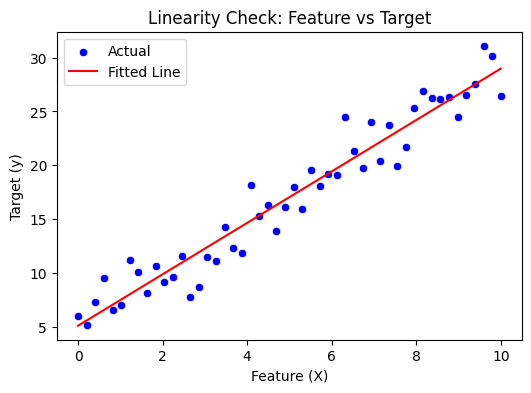

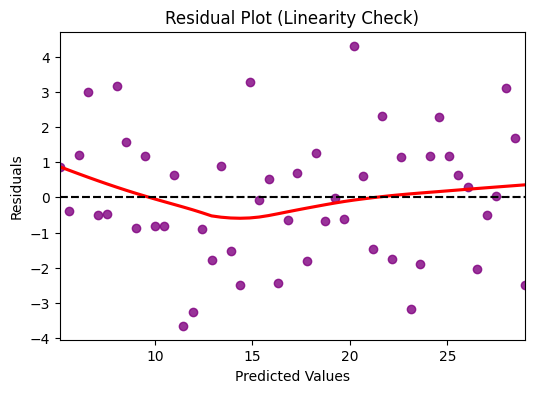

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Generate sample data
np.random.seed(42)
X = np.linspace(0, 10, 50).reshape(-1, 1)
y = 2.5 * X + np.random.randn(50, 1) * 2 + 5  # Linear relationship with noise

# Fit Linear Regression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# --- Scatter plot: Checking linearity visually ---
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X.flatten(), y=y.flatten(), color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Fitted Line')
plt.title("Linearity Check: Feature vs Target")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.legend()
plt.show()

# --- Residual plot: Should show no pattern if linearity holds ---
residuals = y - y_pred
plt.figure(figsize=(6, 4))
sns.residplot(x=y_pred.flatten(), y=residuals.flatten(), color='purple', lowess=True, line_kws={'color': 'red'})
plt.axhline(0, color='black', linestyle='--')
plt.title("Residual Plot (Linearity Check)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


Interpretation of the Residual Plot

✅ Goal:

Residuals (errors) should be randomly scattered around zero — indicating that the linear model appropriately captures the relationship.

🔍 In Your Plot:

The red line (LOWESS smooth) is mostly flat near zero.

Residuals appear randomly distributed without a clear curve or trend.

👉 Conclusion:

This means the linearity assumption is reasonably satisfied.
If the red line had shown a systematic curve (e.g., U-shape), it would suggest a non-linear relationship, and you might consider a polynomial regression or feature transformation (like log or square root).

# 2. 🔁 Independence of Residuals (No Autocorrelation)

✅ Assumption:
Residuals should be independent of each other — meaning the error of one observation should not depend on another.
This is especially important for time series or sequential data.

🔍 How to Check:

Plot residuals vs. observation order (index).

Perform the Durbin–Watson test — values close to 2 indicate no autocorrelation.


- DW ≈ 2: No autocorrelation

- DW<2: Positive autocorrelation

- DW>2: Negative autocorrelation

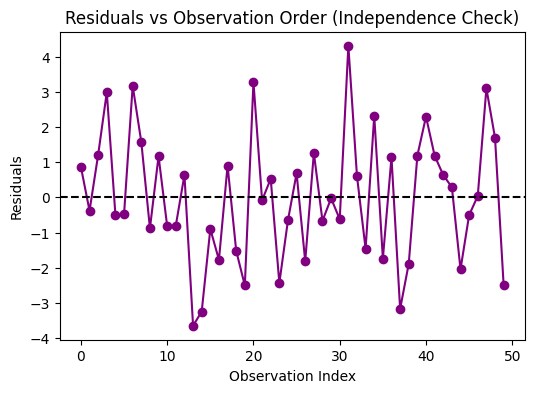

Durbin–Watson Statistic: 1.94


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# Example: assuming y and y_pred are numpy arrays or pandas Series
residuals = y - y_pred

# Plot residuals vs observation order
plt.figure(figsize=(6,4))
plt.plot(residuals, marker='o', color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals vs Observation Order (Independence Check)")
plt.xlabel("Observation Index")
plt.ylabel("Residuals")
plt.show()

# ✅ Durbin–Watson Test (flatten residuals to ensure 1D)
dw_value = durbin_watson(residuals.flatten())
print(f"Durbin–Watson Statistic: {float(dw_value):.2f}")


🧠 Interpretation:

If residuals fluctuate randomly around zero → ✅ Independence satisfied.

If residuals show a clear pattern or sequence → ⚠️ Possible autocorrelation (common in time series).



# 3. Homoscedasticity (Constant Variance of Residuals)
✅ Assumption:

The residuals (errors) should have constant variance across all levels of the predicted values.
In other words, the spread of residuals should be roughly the same for small and large fitted values.

If the variance increases or decreases with predicted values, the data exhibits heteroscedasticity, which violates the assumption.

🔍 How to Check:

Residuals vs Predicted Values Plot:
The residuals should appear randomly scattered without a funnel shape (no pattern).

Statistical Test:

- Breusch–Pagan Test (from statsmodels.stats.diagnostic) can quantitatively detect heteroscedasticity.

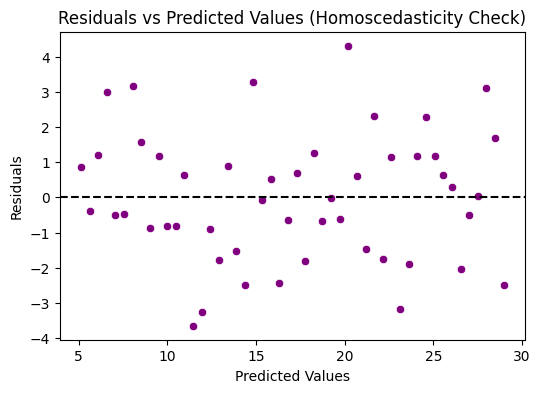

Breusch–Pagan Test Results:
Lagrange multiplier statistic: 0.0921
p-value: 0.7615
f-value: 0.0886
f p-value: 0.7673

✅ Homoscedasticity assumption holds (residuals have constant variance).


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

# Assume y and y_pred are from your regression model
residuals = y - y_pred

# Ensure 1D arrays for plotting
y_pred = np.ravel(y_pred)
residuals = np.ravel(residuals)

# ✅ Residuals vs Predicted Values Plot
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals, color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals vs Predicted Values (Homoscedasticity Check)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# ✅ Breusch–Pagan Test
X_sm = sm.add_constant(y_pred)  # add constant term
bp_test = het_breuschpagan(residuals, X_sm)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

bp_results = dict(zip(labels, bp_test))
print("Breusch–Pagan Test Results:")
for k, v in bp_results.items():
    print(f"{k}: {v:.4f}")

# Interpretation
if bp_results['p-value'] > 0.05:
    print("\n✅ Homoscedasticity assumption holds (residuals have constant variance).")
else:
    print("\n⚠️ Heteroscedasticity detected (variance of residuals changes).")


##### If p-value > 0.05 → homoscedasticity assumption holds (equal residual variance).
##### If p-value < 0.05 → heteroscedasticity → violation.

# 4. Normality of Residuals

✅ Assumption:
Residuals should be normally distributed (bell-shaped curve).
This ensures that inference tests (e.g., confidence intervals and p-values) are valid.

🔍 How to Check:

- Plot a histogram and Q–Q plot of residuals.

- Use a statistical test like the Shapiro–Wilk test or Jarque–Bera test.

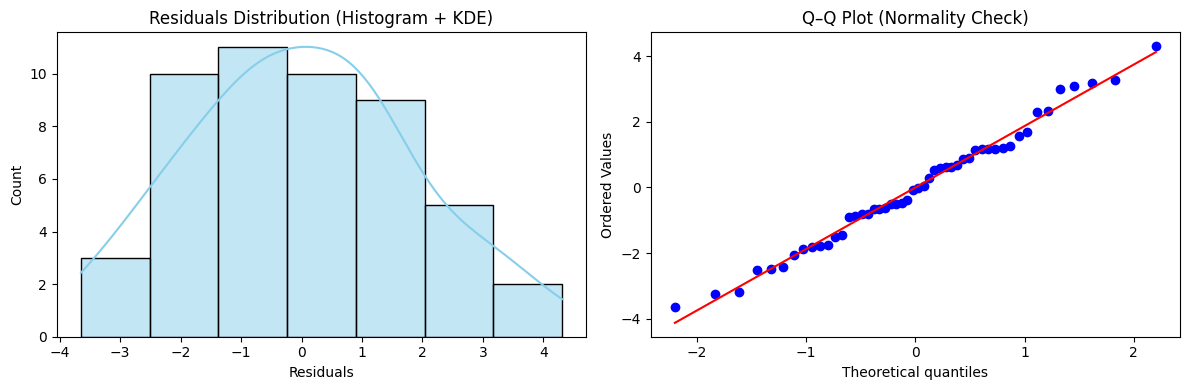

Shapiro–Wilk Test: Statistic=0.9854, p-value=0.7894
Jarque–Bera Test: Statistic=0.6080, p-value=0.7379

✅ Residuals appear to be normally distributed.


In [5]:
from scipy.stats import shapiro, jarque_bera, probplot
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Histogram and Q–Q Plot of Residuals
plt.figure(figsize=(12,4))

# Histogram with KDE
plt.subplot(1,2,1)
sns.histplot(residuals, kde=True, color='skyblue')
plt.title("Residuals Distribution (Histogram + KDE)")
plt.xlabel("Residuals")

# Q–Q Plot
plt.subplot(1,2,2)
probplot(residuals, dist="norm", plot=plt)
plt.title("Q–Q Plot (Normality Check)")
plt.tight_layout()
plt.show()

# ✅ Shapiro–Wilk Test
shapiro_stat, shapiro_p = shapiro(residuals)
print(f"Shapiro–Wilk Test: Statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")

# ✅ Jarque–Bera Test
jb_stat, jb_p = jarque_bera(residuals)
print(f"Jarque–Bera Test: Statistic={jb_stat:.4f}, p-value={jb_p:.4f}")

# Interpretation
if shapiro_p > 0.05 and jb_p > 0.05:
    print("\n✅ Residuals appear to be normally distributed.")
else:
    print("\n❌ Residuals deviate from normality. Consider transformations or robust models.")


Interpretation Guidelines:

Histogram + KDE: should look symmetric, roughly bell-shaped.

Q–Q Plot: points should lie close to the 45° line.

p-value > 0.05: fail to reject normality (✅ OK).

p-value < 0.05: residuals are not normally distributed (❌ potential issue).

# 5. No Multicollinearity

No Multicollinearity (Independent Predictors)

✅ Assumption:
Independent variables (predictors) should not be highly correlated with each other.
High multicollinearity makes it difficult to isolate the individual effect of each variable.

🔍 How to Check:

Compute the correlation matrix — high correlations (> 0.8) indicate potential issues.

Calculate the Variance Inflation Factor (VIF) — quantifies how much variance is inflated due to collinearity.

💡 Rule of thumb:

VIF = 1 → No multicollinearity

VIF < 5 → Acceptable

VIF > 10 → Serious multicollinearity problem

In [14]:
#Multicollinearity (not required for single predictor, but shown for demo))


# VIF only relevant for multiple regression
X_multi = sm.add_constant(df[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']])
pd.DataFrame({
    "Feature": X_multi.columns,
    "VIF": [variance_inflation_factor(X_multi.values, i) for i in range(X_multi.shape[1])]
})


,Feature,VIF
0,const,15.406052
1,MedInc,1.126350
2,HouseAge,1.029877
3,AveRooms,1.136638
4,AveOccup,1.000690


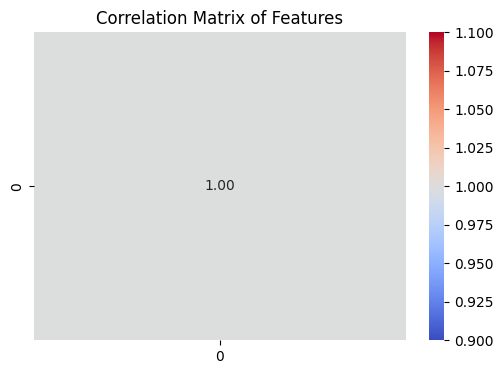

Variance Inflation Factor (VIF) Results:

  Feature   VIF
0   const  3.88
1       0  1.00


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Assume X is your feature DataFrame
X = pd.DataFrame(X)  # Ensure X is a DataFrame
X = sm.add_constant(X)  # Add constant for statsmodels

# Drop the constant for correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(X.drop('const', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

print("Variance Inflation Factor (VIF) Results:\n")
print(vif_data.round(2))


✅ Interpretation:

VIF < 5 → No multicollinearity (good).

VIF 5–10 → Moderate multicollinearity (watch out).


VIF > 10 → Serious multicollinearity problem.